In [1]:
import pandas as pd 
import numpy as np
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...


True

In [3]:
!pip install wordcloud

In [4]:
imdb = pd.read_csv('datasets/imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

# Bag of words analysis

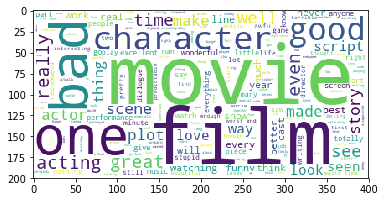

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(imdb['review'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

In [8]:
x = ['a','b','c','d']
' '.join(x)

'a b c d'

# Text Cleaning
- Convert every character to lower case
- Remove junk characters
- Remove commonly used words
- Identify root of the words (play, playing, plays, played) : process is called Stemming

In [10]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '')

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [16]:
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('playing')

'play'

In [22]:
docs_clean = []
for doc in docs.head(5):
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
    
    #print(words_clean)
print(docs_clean)

['slowmov aimless movi distress drift young man  ', 'sure lost  flat charact audienc nearli half walk  ', 'attempt arti black  white clever camera angl movi disappoint  becam even ridicul  act poor plot line almost nonexist  ', 'littl music anyth speak  ', 'best scene movi gerardo tri find song keep run head  ']


In [23]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

# Document Term Matrix

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

In [25]:
docs_clean.shape

(748,)

In [27]:
no_of_zeros = (748 * 2475) - 6797
sparsity = (no_of_zeros) / (748 * 2475) * 100
sparsity

99.63285259007183

In [30]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
(df_dtm == 0).sum().sum() #no of zeros in dtm

1844503

In [33]:
(748 * 2475) - 1844503

6797

In [35]:
df_dtm.sum().sort_values(ascending=False).head(2)

movi    207
film    184
dtype: int64

In [36]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(10)

136    686
19     425
646    408
149    131
135    107
422     41
192     37
223     34
271     31
230     29
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm, test_size=0.2, random_state=100)

In [39]:
train_y = imdb.iloc[train_x.index]['sentiment']
test_y = imdb.iloc[test_x.index]['sentiment']

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=100, n_estimators=300)
rf_model.fit(train_x, train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y, rf_predict_class)

0.72

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
gnb_model = GaussianNB()
gnb_model.fit(train_x, train_y)
gnb_predict_class = gnb_model.predict(test_x)
accuracy_score(test_y, gnb_predict_class)

0.5933333333333334

In [64]:
mnb_model1 = MultinomialNB()
mnb_model1.fit(train_x, train_y)
mnb_predict_class1 = mnb_model1.predict(test_x)
accuracy_score(test_y, mnb_predict_class1)

0.7733333333333333

In [52]:
hotstar = pd.read_csv('datasets/hotstar.allreviews_Sentiments.csv')
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [53]:
hotstar.shape

(5053, 13)

In [54]:
hotstar_df = hotstar[['Lower_Case_Reviews','Sentiment_Manual']]
hotstar_df.head()

,Lower_Case_Reviews,Sentiment_Manual
0,hh,Negative
1,no,Negative
2,@hotstar_helps during paymnt for premium subsc...,Negative
3,@hotstartweets i am currently on jio network a...,Negative
4,@hotstartweets the episodes of sarabhai vs sar...,Negative


In [55]:
hotstar_rev = hotstar_df['Lower_Case_Reviews'].str.lower().str.replace('[^a-z ]', '')
hotstar_clean = hotstar_rev.apply(clean_sentence)

In [56]:
vectorizer_hot = CountVectorizer()
vectorizer_hot.fit(hotstar_clean)
dtm_hotstar = vectorizer_hot.transform(hotstar_clean)
dtm_hotstar

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [57]:
df_dtm_hotstar = pd.DataFrame(dtm_hotstar.toarray(), columns=vectorizer_hot.get_feature_names())
(df_dtm_hotstar == 0).sum().sum() #no of zeros in dtm_hotstar

31013412

In [58]:
from sklearn.model_selection import train_test_split
hotstar_train_x, hotstar_test_x = train_test_split(df_dtm_hotstar, test_size=0.2, random_state=100)

In [59]:
hotstar_train_y = hotstar.iloc[hotstar_train_x.index]['Sentiment_Manual']
hotstar_test_y = hotstar.iloc[hotstar_test_x.index]['Sentiment_Manual']

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model2 = RandomForestClassifier(random_state=100, n_estimators=300)
rf_model2.fit(hotstar_train_x, hotstar_train_y)
rf_predict_class_hotstar = rf_model2.predict(hotstar_test_x)
accuracy_score(hotstar_test_y, rf_predict_class_hotstar)

0.7299703264094956

In [62]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(hotstar_train_x, hotstar_train_y)
mnb_predict_class = mnb_model.predict(hotstar_test_x)
accuracy_score(hotstar_test_y, mnb_predict_class)

0.7359050445103857

# TF-IDF Vectorization

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

train, test = train_test_split(docs_clean, test_size=0.2, random_state=100)
tfidf = TfidfVectorizer()
tfidf.fit(train)
train_dtm_tfidf = tfidf.transform(train)
test_dtm_tfidf = tfidf.transform(test)

df_train_tfidf = pd.DataFrame(train_dtm_tfidf.toarray(),columns=tfidf.get_feature_names())
df_test_tfidf = pd.DataFrame(test_dtm_tfidf.toarray(), columns=tfidf.get_feature_names())

train_y = imdb.iloc[df_train_tfidf.index]['sentiment']
test_y = imdb.iloc[df_test_tfidf.index]['sentiment']

In [68]:
rf_model3 = RandomForestClassifier(random_state=100, n_estimators=300)
rf_model3.fit(df_train_tfidf, train_y)
rf_predict_class2 = rf_model3.predict(df_test_tfidf)
accuracy_score(test_y, rf_predict_class2)

0.4866666666666667

# Exercise : Tweets Clustering
- Using Narendra Modi's tweets data, identify minimum and maximum date from created_at column
- Create word cloud using all the rows from text column
- Clean the text column
    - Convert all characters to lower case
    - Apply regular expressions to retain only alphabets, #, @ and spaces
    - Remove stop words
    - Apply stemming
- Create the Document Term Matrix using CountVectorizer; Set min_df=5
- Using KMeans algorithm, cluster the tweets into 4 groups
- Create word cloud for each group

In [69]:
modi_tweets = pd.read_csv('datasets/narendramodi_tweets.csv')
modi_tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


### Using Narendra Modi's tweets data, identify minimum and maximum date from created_at column

In [72]:
min_date = modi_tweets['created_at'].min()
max_date = modi_tweets['created_at'].max()
print('Min Date: ',min_date)
print('Max Date: ',max_date)

Min Date:  2016-03-09 12:22:10
Max Date:  2017-01-31 11:00:07


### Create word cloud using all the rows from text column

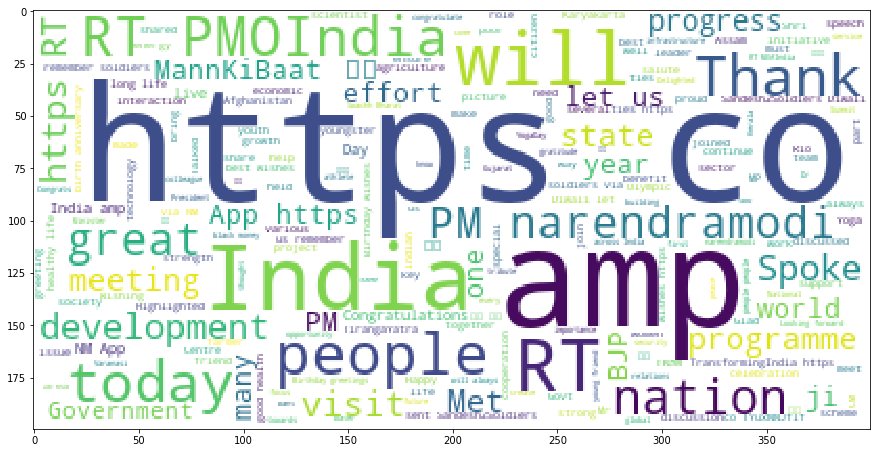

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(modi_tweets['text'])
plt.figure(figsize=(15,10))
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

### Clean the text column
- Convert all characters to lower case
- Apply regular expressions to retain only alphabets, #, @ and spaces
- Remove stop words
- Apply stemming

In [76]:
modi_txt = modi_tweets['text'].str.lower().str.replace('[^a-z @#]', '')
modi_txt.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [77]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [91]:
modi_txt_clean = modi_txt.apply(clean_sentence)
modi_txt_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2       rt @pmoindia empow marginalis httpstcowwsqgwdk
3    rt @pmoindia commit welfar farmer httpstcopaaf...
4    rt @pmoindia improv qualiti life poor httpstco...
Name: text, dtype: object

### Create the Document Term Matrix using CountVectorizer; Set min_df=5

In [79]:
vectorizer_modi = CountVectorizer(min_df=5)
vectorizer_modi.fit(modi_txt_clean)
dtm_modi = vectorizer_modi.transform(modi_txt_clean)
dtm_modi

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [80]:
df_dtm_modi = pd.DataFrame(dtm_modi.toarray(), columns=vectorizer_modi.get_feature_names())
(df_dtm_modi == 0).sum().sum() #no of zeros in dtm_hotstar

3929360

### Using KMeans algorithm, cluster the tweets into 4 groups

In [83]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=4)
km_model.fit(df_dtm_modi)
labels = km_model.predict(df_dtm_modi)
len(labels)

3220

In [92]:
modi_txt_clean_wc = modi_txt
tweets_df = pd.DataFrame({'text':modi_txt_clean_wc,'cluster':labels})
tweets_df.head()

,text,cluster
0,the presidents address wonderfully encapsulate...,0
1,rashtrapati jis address to both houses of parl...,0
2,rt @pmoindia empowering the marginalised https...,1
3,rt @pmoindia commitment to welfare of farmers ...,1
4,rt @pmoindia improving the quality of life for...,1


### Create word cloud for each group

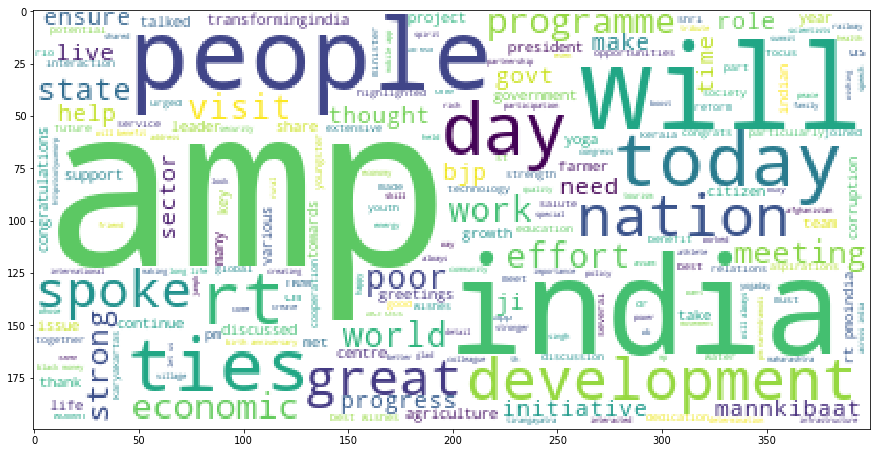

In [93]:
input_string0 = ' '.join(tweets_df[tweets_df['cluster']==0]['text'])
plt.figure(figsize=(15,10))
wc_cluster0 = WordCloud(background_color='white').generate(input_string0)
plt.imshow(wc_cluster0)

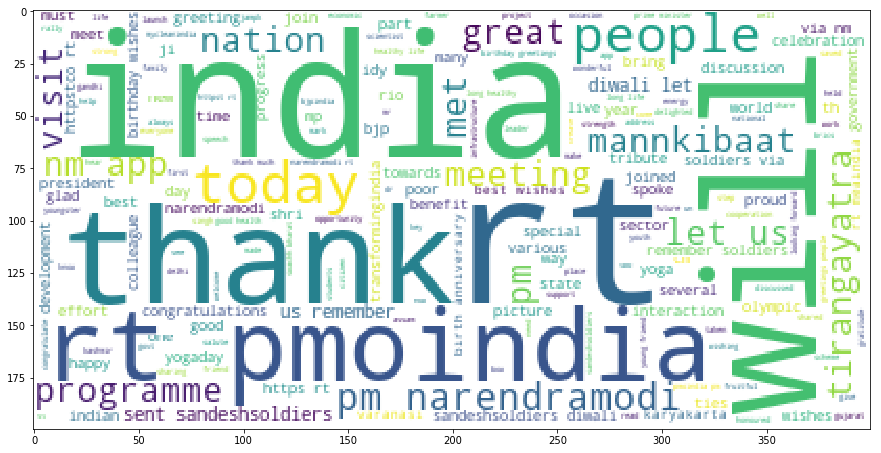

In [94]:
input_string1 = ' '.join(tweets_df[tweets_df['cluster']==1]['text'])
plt.figure(figsize=(15,10))
wc_cluster1 = WordCloud(background_color='white').generate(input_string1)
plt.imshow(wc_cluster1)

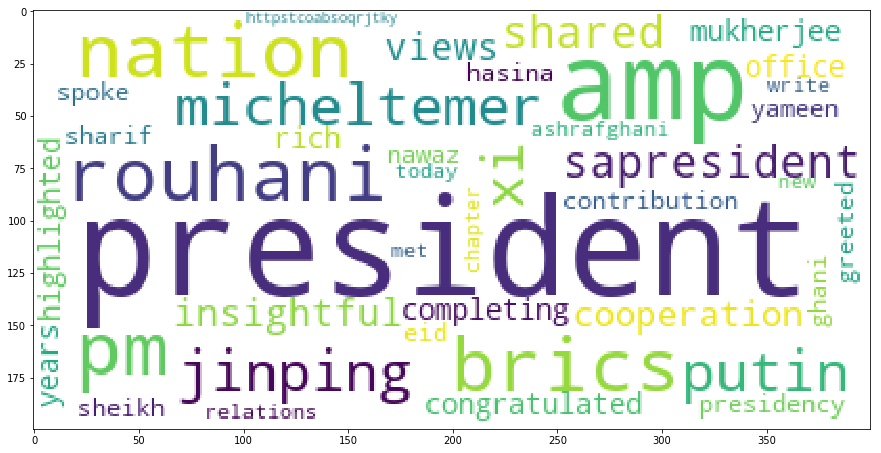

In [95]:
input_string2 = ' '.join(tweets_df[tweets_df['cluster']==2]['text'])
plt.figure(figsize=(15,10))
wc_cluster2 = WordCloud(background_color='white').generate(input_string2)
plt.imshow(wc_cluster2)

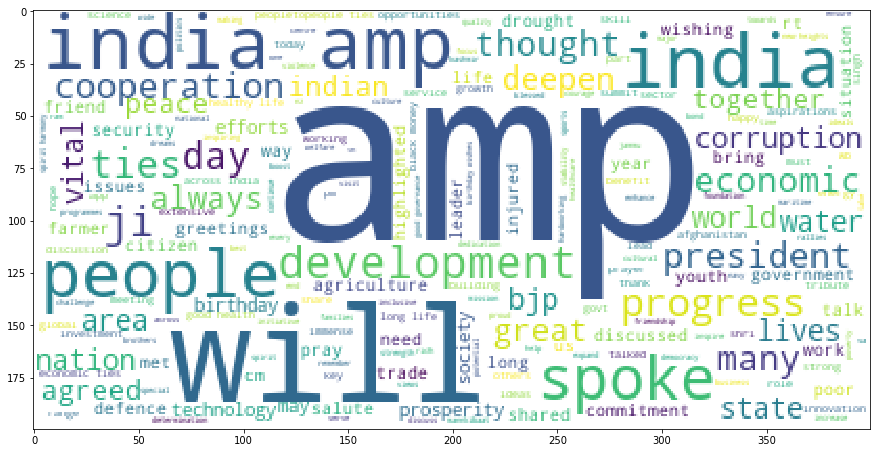

In [96]:
input_string3 = ' '.join(tweets_df[tweets_df['cluster']==3]['text'])
plt.figure(figsize=(15,10))
wc_cluster3 = WordCloud(background_color='white').generate(input_string3)
plt.imshow(wc_cluster3)